<a href="https://colab.research.google.com/github/akashkumar19/the-sparks-foundation/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Spark Foundation
## Author : Akash Kumar
### Predict the Percentage of an student based on the no. of Study Hours
### This is simple linear regression task as it involves just 2 variables


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [3]:
#load the dataset
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
print('Data imported successfully')
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# shape of dataset
df.shape

(25, 2)

In [5]:
# checking if any null values exist
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing data

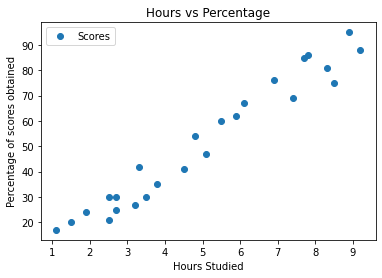

In [8]:
df.plot(x='Hours', y='Scores', style= 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of scores obtained')
plt.show()

From the graph we can clearly see their is postive linear relationship between No of Hours Studied and Percentage of scores obtained

In [9]:
# seeing coorelation between variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Selecting Features(x) and Target variable(y)



In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

### Train/Test split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the algorithm

In [12]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

### Visualization

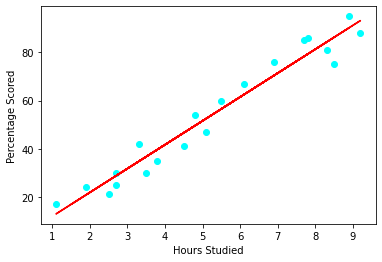

In [13]:
#plotting for the training data
line = LR.coef_ * X + LR.intercept_

plt.scatter(X_train, y_train, color='cyan')
plt.plot(X, line, color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

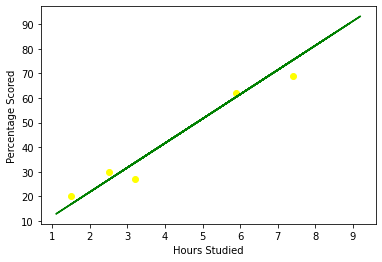

In [14]:
#plotting for testing data
line = LR.coef_ * X + LR.intercept_

plt.scatter(X_test, y_test, color='yellow')
plt.plot(X, line, color='green')
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Scored')
plt.show()

### Making Predictions

In [15]:
print(X_test) #testing data in hours
yhat = LR.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#comparing actual vs predicted
df1 = pd.DataFrame({'Actual': y_test,'Predicted':yhat})
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# test with given data
hours = 9.25
own_pred = LR.predict([[hours]])
print(f'If a person study for {hours} then he/she will get {own_pred[0]} % of score')

If a person study for 9.25 then he/she will get 93.69173248737539 % of score


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
print('Mean Absolute error : %.2f' % metrics.mean_absolute_error(y_test, yhat))
print('Mean Squared error : %.2f' % metrics.mean_squared_error(y_test, yhat))
print('R2 Score : %.2f' % metrics.r2_score(y_test, yhat))

Mean Absolute error : 4.18
Mean Squared error : 21.60
R2 Score : 0.95


## Conclusion
### I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.
### Thank You